[Link to video (part 1)](https://youtu.be/C3pABJodZhY)

# Interpreting deep networks

It used to be assumed that neural networks and especially deep neural networks were "black box" models which means that understanding how the model arrived at it's solution is just as hard as understanding the original problem. However, progress has been made in recent years. The field is very new and does not have definite nomenclature. This means that a software package may seem like it does what you want but really it does something slightly different. So it's useful to understand the general methods that are employed and how they differ. 

*    **Feature visualization AKA "activation maximization", "activation optimization", and more**    
        These methods try to find an input which has a desired effect on the network (or other model). The simplest example is finding a set of pixels (an image) which maximizes the activation of an individual neurons.    
        There are lots different versions of this. Consider: What's the best way to find the image? Searching randomly through pixel space? Combining images from the training set, or test set? How about picking the neuron, what if we pick whole layers or other parts instead? Do we always want to maximize, or minimize? There's no guarantee that only one image will maximize activation, so which image is most informative?
*    **Saliecy maps AKA attention, class activation maps, attribution and more**    
        These methods try to figure out what parts of an image were important in the process of assigning the label. In general they work by tweaking the input or parts of the input and propagating those changes through to the final decision layer. In this manner we can see how sensitive the model is to input elements. 
*    **Shapely values**    
        This is really a member of the second group but is so old and venerable it belongs to be in it's own category. It's value comes from it's  generalizability beyond image classification and the depth of literature on it, it's not necessarily any more powerful. With this method features (which need not be pixels) are swapped between the datapoint of interest and some other datapoint. We can then measure how much that feature contributes to the problem solution.
        
        
**Additional methods and resources**

[Extensive resource for google implementation of CNN interpretation: Lucid](
https://github.com/tensorflow/lucid#notebooks)

[Focused set of elementary CNN visualization tools: keras-viz](https://github.com/raghakot/keras-vis) Activation maximization, Class activation maps, Saliency maps

[Suite of attribution methods including Shapely for CNNs: DeepExplain](https://github.com/marcoancona/DeepExplain)

[Integrated gradients for CNN](https://github.com/ankurtaly/Integrated-Gradients)

[(article + code) Interpreting convolutional neural networks](https://www.jebruner.com/2017/07/interpreting-and-fooling-convolutional-neural-networks-part-1/)


<table>
<tbody>
<tr>
<td>
  
<div>
<div class="images">
  <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/neuron.png" width=200>
  <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/channel.png" width=200>
</div>
<figcaption>
  <strong>Feature visualization</strong> answers questions about what a network — or parts <br>of a network — are looking for by generating examples.
</figcaption>
</div>
  
</td>
<td>
  
<div>
<div class="images">
  <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/attribution-1.png" width=200>
  <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/attribution-2.jpg" width=200>
</div>
<figcaption>
<strong>Attribution</strong>
  <d-footnote id="d-footnote-1">
    As a young field, neural network interpretability does not yet have <br>standardized terminology.
    Attribution has gone under many different names <br>in the literature — including “feature visualization”! — but recent work seems <br>to prefer terms like “attribution” and “saliency maps”.
  </d-footnote>
studies what part of an <br>example is responsible for the network activating a particular way.
</figcaption>
</div>
  
</td>
</tr>
</tbody></table>

# Activation optimization



<table>
<tbody>
<tr>
  
<td>
  <figcaption style="grid-column: kicker;">
    <p>Different <strong>optimization <br>objectives</strong> show what<br>different parts of a<br>network are looking for.</p>
    <br>
    <p><code><strong>n</strong></code> layer index <br>
      <code><strong>x,y</strong></code> spatial position<br>
      <code><strong>z</strong></code> channel index <br>
      <code><strong>k</strong></code> class index</p>
  </figcaption>
</td>
  
<td>
  <div class="objectives grid">
    <div class="objective">
      <div class="objective-icon">
        <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/Neuron_viz.png" width=150>
      </div>
      <img class="objective-opt" src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/neuron.png" width=150>
      <figcaption><strong>Neuron</strong><br><code>layer<sub>n</sub>[x,y,z]</code></figcaption>
    </div>
</td>
  
<td>
  <div class="objective">
    <div class="objective-icon">
      <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/channel_vis.png" width=150>
    </div>
    <img class="objective-opt" src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/channel.png" width=150>
    <figcaption><strong>Channel</strong><br><code>layer<sub>n</sub>[:,:,z]</code></figcaption>
  </div>

</td>
  
<td>
<div class="objective">
  <div class="objective-icon">
    <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/Layer_vis.png" width=150>
  </div>
  <img class="objective-opt" src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/layer.png" width=150>
  <figcaption><strong>Layer</strong>/DeepDream<br><code>layer<sub>n</sub>[:,:,:]<sup>2</sup></code></figcaption>
</div>
</td>
  
<td>
<div class="objective">
  <div class="objective-icon">
    <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/pre_lu_vis.png" width=150>
  </div>
  <img class="objective-opt" src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/logits.png" width=150>
  <figcaption><strong>Class Logits</strong><br><code>pre_softmax[k]</code></figcaption>
</div>
</td>
  
<td>
<div class="objective">
  <div class="objective-icon">
    <img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/class_prob_vis.png" width=150>
  </div>
  <img class="objective-opt" src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/logits_post.png" width=150>
  <figcaption><strong>Class Probability</strong><br><code>softmax[k]</code></figcaption>
</div>
</td>
</tr>
</tbody></table>



##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucid: A Quick Tutorial

This tutorial quickly introduces [**Lucid**](https://github.com/tensorflow/lucid), a network for visualizing neural networks. Lucid is a kind of spiritual successor to DeepDream, but provides flexible abstractions so that it can be used for a wide range of interpretability research.

**Note**: The easiest way to use this tutorial is [as a colab notebook](https://colab.sandbox.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb), which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

Thanks for trying Lucid!

<img src="https://storage.googleapis.com/lucid-static/common/stickers/channels-visualizations.jpg" width="600"></img>



## Install, Import, Load Model

In [0]:
# Install Lucid

!pip install --quiet lucid==0.2.3
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [0]:
# Imports

import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [0]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

W0813 13:06:18.519507 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/misc/io/reading.py:120: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0813 13:06:18.625656 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/modelzoo/util.py:38: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



In this tutorial, we will be visualizing InceptionV1, also known as GoogLeNet.

While we will focus on a few neurons, you may wish to experiment with visualizing others. If you'd like, you can try any of the following layers: `conv2d0, maxpool0, conv2d1, conv2d2, maxpool1, mixed3a, mixed3b, maxpool4, mixed4a, mixed4b, mixed4c, mixed4d, mixed4e, maxpool10, mixed5a, mixed5b`.

You can learn more about GoogLeNet in the [paper](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf). You can also find visualizations of all neurons in mixed3a-mixed5b [here](https://distill.pub/2017/feature-visualization/appendix/).

## Visualize a Neuron

W0813 13:06:18.680720 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/optvis/render.py:88: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0813 13:06:18.716794 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/optvis/param/spatial.py:54: The name tf.spectral.irfft2d is deprecated. Please use tf.signal.irfft2d instead.

W0813 13:06:18.736779 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/optvis/render.py:223: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 13:06:18.737831 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/lucid/optvis/render.py:241: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0813 13:06:18.739138 139865149896576 deprecation_wrapper.py:119] From /usr/local/lib

512 1318.5211



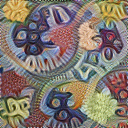

In [0]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed4a_pre_relu:476")

## Getting a bit deeper

Lucid splits visualizations into a few components which you can fiddle with completely indpendently:

* **objectives** -- What do you want the model to visualize?
* **parameterization** -- How do you describe the image?
* **transforms** -- What transformations do you want your visualization to be robust to?

In this section, we'll experiment with each one.

**Experimenting with objectives**

512 1579.4005



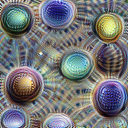

In [0]:
# Let's visualize another neuron using a more explicit objective:

obj = objectives.channel("mixed4a_pre_relu", 465)
_ = render.render_vis(model, obj)

512 2460.123



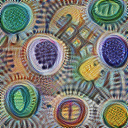

In [0]:
# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)

channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

**Transformation Robustness**

Recomended reading: The Feature Visualization article's section titled [The Enemy of Feature Visualization](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis) discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

512 2331.3955



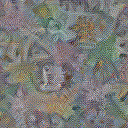

In [0]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1881.8735



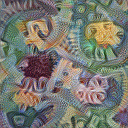

In [0]:
# Jitter 2

transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1059.8649



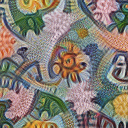

In [0]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(list(range(-10,10)) + list(range(-5,5)) + 10*list(range(-2,2))),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

**Experimenting with parameterization**

Recomended reading: The Feature Visualization article's section on [Preconditioning and Parameterization](https://distill.pub/2017/feature-visualization/#preconditioning)

512 944.4154



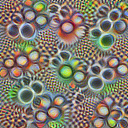

In [0]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

512 898.71796



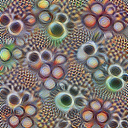

In [0]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

## Highly recommended activity

[work through and understand the Visualization Regularization notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/feature-visualization/regularization.ipynb)

[Then work through the large suite of methods exampled in the lucid tutorial set. Read the accompanying articles linked to at the top of most sections.](https://github.com/tensorflow/lucid#notebooks)

# Attribution

https://github.com/ankurtaly/Integrated-Gradients

https://github.com/ankurtaly/Integrated-Gradients/tree/master/howto.md

## WARNING: CHANGE RUNTIME TYPE TO PYTHON 2


In [0]:
!git clone https://github.com/ankurtaly/Attributions

Cloning into 'Attributions'...
remote: Enumerating objects: 537, done.
remote: Total 537 (delta 0), reused 0 (delta 0), pack-reused 537
Receiving objects: 100% (537/537), 152.85 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Checking out files: 100% (225/225), done.


In [0]:
cd Attributions

/content/Attributions


In [0]:
# Imports
import os
import sys
import tensorflow as tf

from InceptionModel.inception_utils import load_model, load_labels_vocabulary, make_predictions_and_gradients, top_label_id_and_score
from IntegratedGradients.integrated_gradients import integrated_gradients, random_baseline_integrated_gradients
from VisualizationLibrary.visualization_lib import Visualize, show_pil_image, pil_image

In [0]:
MODEL_LOC='./InceptionModel/tensorflow_inception_graph.pb'
LABELS_LOC='./InceptionModel/imagenet_comp_graph_label_strings.txt'

# Load the Inception model.
sess, graph = load_model(MODEL_LOC)

# Load the Labels vocabulary.
labels = load_labels_vocabulary(LABELS_LOC)

# Make the predictions_and_gradients function
inception_predictions_and_gradients = make_predictions_and_gradients(sess, graph)

W0813 13:25:42.324434 140441307264896 deprecation_wrapper.py:119] From InceptionModel/inception_utils.py:8: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0813 13:25:42.326087 140441307264896 deprecation_wrapper.py:119] From InceptionModel/inception_utils.py:9: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.

W0813 13:25:42.379369 140441307264896 deprecation_wrapper.py:119] From InceptionModel/inception_utils.py:10: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W0813 13:25:42.937483 140441307264896 deprecation_wrapper.py:119] From InceptionModel/inception_utils.py:31: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



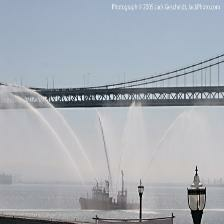

In [0]:
# Load the image.
def load_image(img_path):
  with open(img_path) as f:
    img = f.read()
    img = sess.run(tf.image.decode_jpeg(img))
    return img

img = load_image('./Images/70bfca4555cca92e.jpg')
show_pil_image(pil_image(img))

Top label: fireboat, score: 0.999985
Gradients


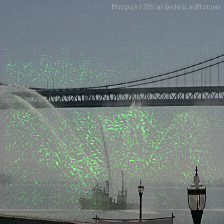

Integrated Gradients


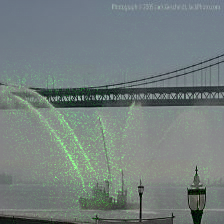

In [0]:
# Determine top label and score.
top_label_id, score = top_label_id_and_score(img, inception_predictions_and_gradients)
print "Top label: %s, score: %f" % (labels[top_label_id], score)

# Compute attributions based on just the gradients.
_, gradients = inception_predictions_and_gradients([img], top_label_id)

print 'Gradients'
show_pil_image(pil_image(Visualize(
    gradients[0], img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

# Compute attributions based on the integrated gradients method.
attributions = random_baseline_integrated_gradients(
    img,
    top_label_id,
    inception_predictions_and_gradients,
    steps=50,
    num_random_trials=10)

print 'Integrated Gradients'
show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True)))

Clipping
The two graphs below show the top and bottom clipping on the attribution distribution curve.


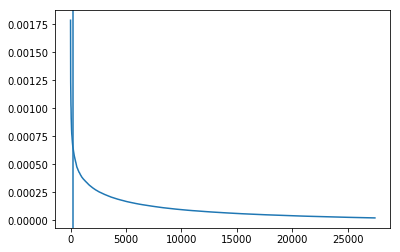

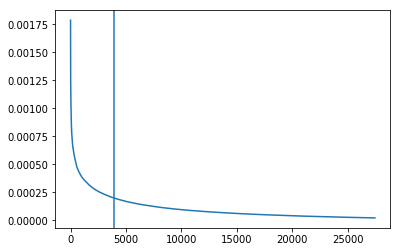

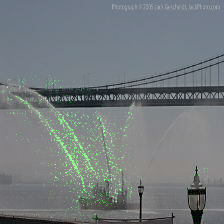

In [0]:
# Clipping
print 'Clipping'
print 'The two graphs below show the top and bottom clipping on the attribution distribution curve.'

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    overlay=True,
    plot_distribution=True)))

Clipping + Morphological cleanup


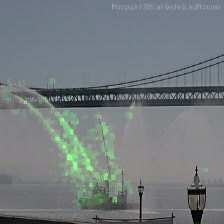

In [0]:
# Morphological cleanup
print 'Clipping + Morphological cleanup'

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    overlay=True)))

Outlines


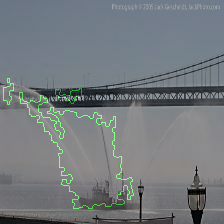

In [0]:
# Outlines
print 'Outlines'

show_pil_image(pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    outlines=True,
    overlay=True)))

Top label: baboon, score: 0.989468


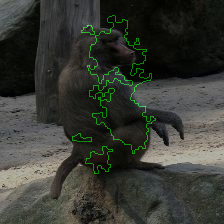

Top label: cabbage butterfly, score: 0.993752


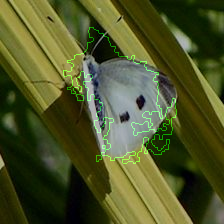

Top label: African hunting dog, score: 0.993349


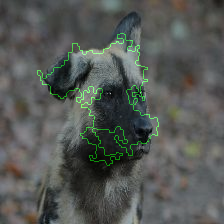

Top label: stopwatch, score: 0.998707


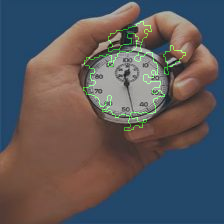

Top label: indigo bunting, score: 0.995035


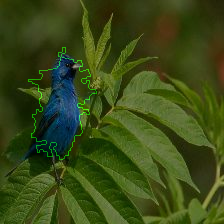

Top label: Saint Bernard, score: 0.993977


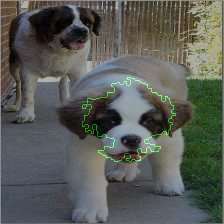

Top label: drilling platform, score: 0.999990


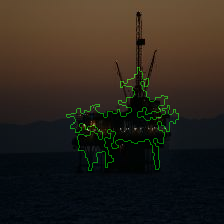

Top label: fireboat, score: 0.999985


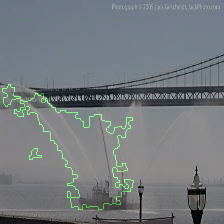

Top label: brambling, score: 0.999757


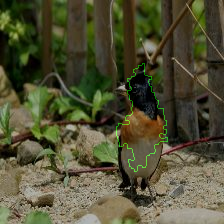

Top label: jacamar, score: 0.999746


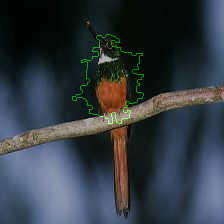

Top label: reflex camera, score: 0.999117


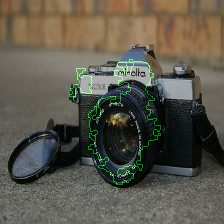

Top label: ringneck snake, score: 0.922521


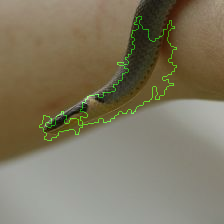

In [0]:
# Show outlines for a few example images.
image_paths = [
    "./Images/023d8b91c64faf4b.jpg",
    "./Images/1bd6987fa9219dec.jpg",
    "./Images/1e626579f6ad7b2b.jpg",
    "./Images/1eb9afc2b4e01ecd.jpg",
    "./Images/407378360d17f0e6.jpg",
    "./Images/518a1c0660c5e32e.jpg",
    "./Images/6717aba6a10b230f.jpg",
    "./Images/70bfca4555cca92e.jpg",
    "./Images/73db3c274688a2e0.jpg",
    "./Images/87fa4cf351b87562.jpg",
    "./Images/8e570672510267d3.jpg",
    "./Images/b19f875f181025d3.jpg",
]

for image_path in image_paths:
  # Load image.
  img = load_image(image_path)
    
  # Compute the top label and score.
  top_label_id, score = top_label_id_and_score(img, inception_predictions_and_gradients)
  print "Top label: %s, score: %f" % (labels[top_label_id], score)
    
  # Compute the random baseline integrated gradients.
  attributions = random_baseline_integrated_gradients(
      img,
      top_label_id,
      inception_predictions_and_gradients,
      steps=50,
      num_random_trials=10)
    
  show_pil_image(pil_image(Visualize(
      attributions, img,
      clip_above_percentile=95,
      clip_below_percentile=58,
      morphological_cleanup=True,
      outlines=True,
      overlay=True)))

In [0]:
cd ../

/content


# Shapely values and basic techniques

In what follows we copy some tutorials from "Kaggle Kernels", this is an excellent resource for getting up to speed with Machine Learning as quickly as possible (especially if you have a little bit of python). 


**Basic packages**

https://eli5.readthedocs.io/en/latest/overview.html#features

https://github.com/SauceCat/PDPbox

https://github.com/slundberg/shap

**Introduction to Machine Learning Explainability from Kaggle**

https://www.kaggle.com/learn/machine-learning-explainability

##Permutation importance

Permutation importanceis calculated after a model has been fitted. So we won't change the model or change what predictions we'd get for a given value of height, sock-count, etc.

Instead we will ask the following question: If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?

<img src="https://i.imgur.com/h17tMUU.png" alt="Shuffle">

With this insight, the process is as follows:

Get a trained model.
Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.

## Code Example
Our example will use a model that predicts whether a soccer/football team will have the "Man of the Game" winner based on the team's statistics. The "Man of the Game" award is given to the best player in the game. Model-building isn't our current focus, so the cell below loads the data and builds a rudimentary model.

## NOW SWITCH BACK TO PYTHON 3

In [0]:
!git clone https://github.com/SauceCat/PDPbox

Cloning into 'PDPbox'...
remote: Enumerating objects: 1436, done.
remote: Total 1436 (delta 0), reused 0 (delta 0), pack-reused 1436
Receiving objects: 100% (1436/1436), 238.79 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (798/798), done.


In [0]:
cd ./PDPbox

/content/PDPbox


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating PDPbox.egg-info
writing PDPbox.egg-info/PKG-INFO
writing dependency_links to PDPbox.egg-info/dependency_links.txt
writing requirements to PDPbox.egg-info/requires.txt
writing top-level names to PDPbox.egg-info/top_level.txt
writing manifest file 'PDPbox.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'PDPbox.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pdpbox
copying pdpbox/info_plot_utils.py -> build/lib/pdpbox
copying pdpbox/get_dataset.py -> build/lib/pdpbox
copying pdpbox/_version.py -> build/lib/pdpbox
copying pdpbox/pdp.py -> build/lib/pdpbox
copying pdpbox/__init__.py -> build/lib/pdpbox
copying pdpbox/pdp_plot_utils.py -> build/lib/pdpbox
copying pdpbox/utils.py -> build/lib/pdpbox
copying pdpbox/info_plots.py -> build/lib/pdpbox
copying pdpbox/pdp_calc_utils.py 

In [0]:
! pip install shap
! pip install eli5
!wget "https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/FIFA%202018%20Statistics.csv"

     |████████████████████████████████| 235kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.29.3-cp36-cp36m-linux_x86_64.whl size=344734 sha256=52b744231d262d905b19e06cec7eef57fdad695f2edfbcca3db0e573777d985c
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built shap
     |████████████████████████████████| 102kB 4.6MB/s 
--2019-08-13 14:46:06--  https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%205%20-%20Goal%204%20-%20Scientific%20Insights%20from%20Learned%20Models/Ex%207%20-%20Interpreting%20large%20models/Data/FIFA%202018%20Statistics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12428 (12K) [text/plain]
Saving to: ‘FIFA 2018 Statistics.csv’

FIFA 2

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('./FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


## Partial Dependence Plots


While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

This is useful to answer questions like:

Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas?

Are predicted health differences between two groups due to differences in their diets, or due to some other factor?


Like permutation importance, partial dependence plots are calculated after a model has been fit. The model is fit on real data that has not been artificially manipulated in any way.

In our soccer example, teams may differ in many ways. How many passes they made, shots they took, goals they scored, etc. At first glance, it seems difficult to disentangle the effect of these features.

To see how partial plots separate out the effect of each feature, we start by considering a single row of data. For example, that row of data might represent a team that had the ball 50% of the time, made 100 passes, took 10 shots and scored 1 goal.

We will use the fitted model to predict our outcome (probability their player won "man of the match"). But we repeatedly alter the value for one variable to make a series of predictions. We could predict the outcome if the team had the ball only 40% of the time. We then predict with them having the ball 50% of the time. Then predict again for 60%. And so on. We trace out predicted outcomes (on the vertical axis) as we move from small values of ball possession to large values (on the horizontal axis).

In this description, we used only a single row of data. Interactions between features may cause the plot for a single row to be atypical. So, we repeat that mental experiment with multiple rows from the original dataset, and we plot the average predicted outcome on the vertical axis.

## Code Example

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('./FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

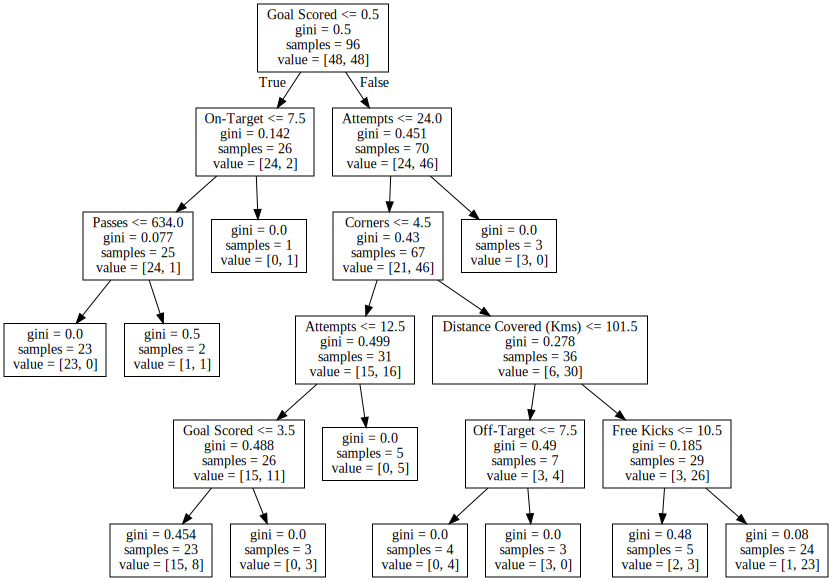

In [0]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

As guidance to read the tree:

Leaves with children show their splitting criterion on the top
The pair of values at the bottom show the count of True values and False values for the target respectively, of data points in that node of the tree.

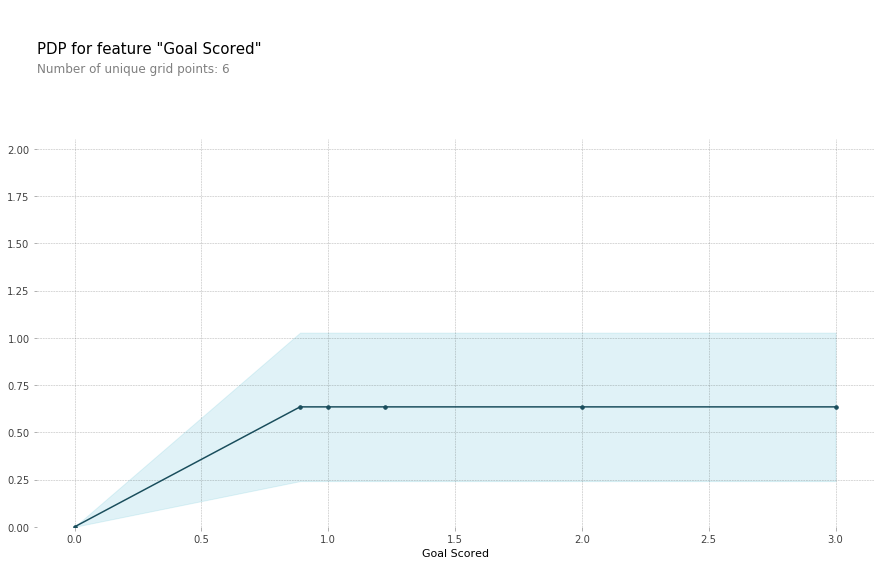

In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
feature_to_plot='Goal Scored'
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

# plot it
pdp.pdp_plot(pdp_goals, feature_to_plot)
plt.show()

A few items are worth pointing out as you interpret this plot

The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
A blue shaded area indicates level of confidence
From this particular graph, we see that scoring a goal substantially increases your chances of winning "Man of The Match." But extra goals beyond that appear to have little impact on predictions.

Here is another example plot:This graph seems too simple to represent reality. But that's because the model is so simple. You should be able to see from the decision tree above that this is representing exactly the model's structure.

You can easily compare the structure or implications of different models. Here is the same plot with a Random Forest model.

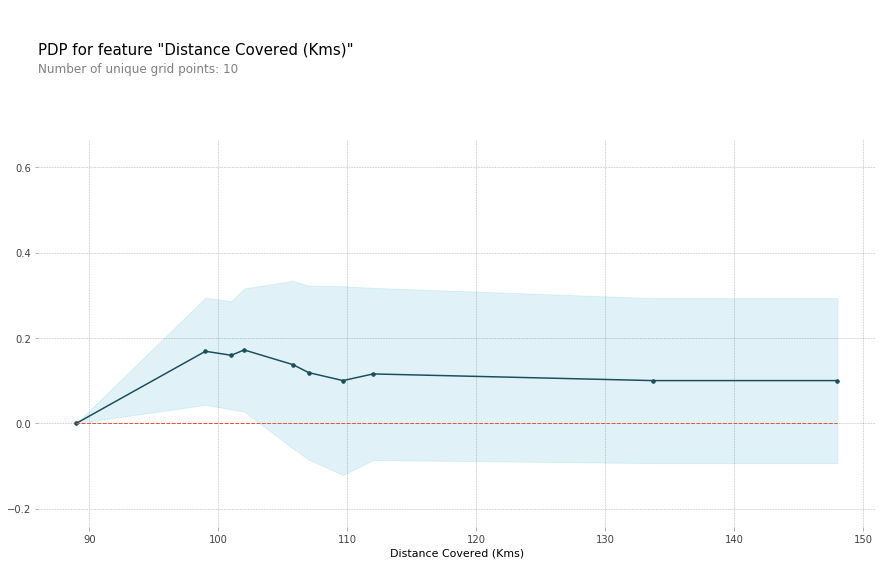

In [0]:
# Build Random Forest model
feature_to_plot='Distance Covered (Kms)'
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

## 2D Partial Dependence Plots
If you are curious about interactions between features, 2D partial dependence plots are also useful. An example may clarify this.

We will again use the Decision Tree model for this graph. It will create an extremely simple plot, but you should be able to match what you see in the plot to the tree itself.

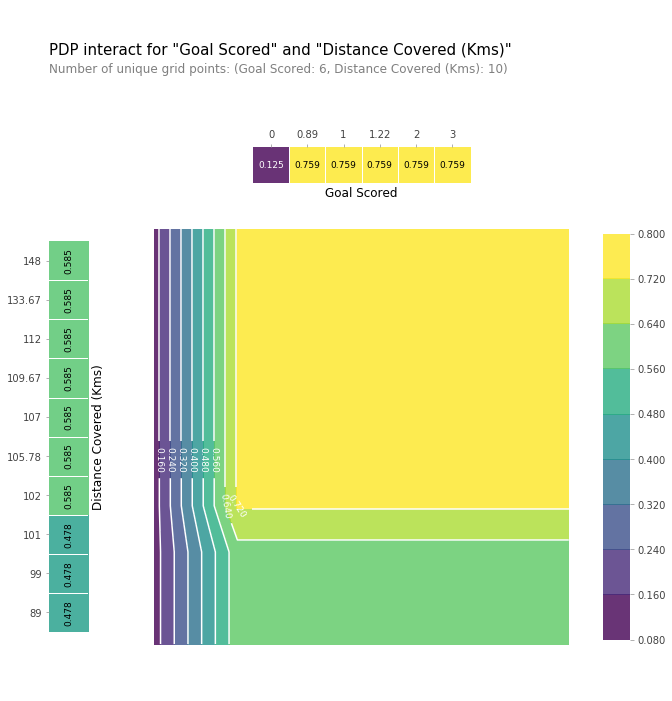

In [0]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()

This graph shows predictions for any combination of Goals Scored and Distance covered.

For example, we see the highest predictions when a team scores at least 1 goal and they run a total distance close to 100km. If they score 0 goals, distance covered doesn't matter. Can you see this by tracing through the decision tree with 0 goals?

But distance can impact predictions if they score goals. Make sure you can see this from the 2D partial dependence plot. Can you see this pattern in the decision tree too?

## Shapely values proper

You've seen (and used) techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this?

A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

An example is helpful, and we'll continue the soccer/football example from the permutation importance and partial dependence plots lessons.

In these tutorials, we predicted whether a team would have a player win the Man of the Match award.

We could ask:

How much was a prediction driven by the fact that the team scored 3 goals?
But it's easier to give a concrete, numeric answer if we restate this as:

How much was a prediction driven by the fact that the team scored 3 goals, instead of some baseline number of goals.
Of course, each team has many features. So if we answer this question for `number of goals`, we could repeat the process for all other features.

SHAP values do this in a way that guarantees a nice property. Specifically, you decompose a prediction with the following equation:

`sum(SHAP values for all features) = pred_for_team - pred_for_baseline_values`

That is, the SHAP values of all features sum up to explain why my prediction was different from the baseline. This allows us to decompose a prediction in a graph like this:

<img src="https://i.imgur.com/JVD2U7k.png" width=2000>

How do you interpret this?

We predicted 0.7, whereas the base_value is 0.4979. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from `Goal Scored` being 2. Though the ball possession value has a meaningful effect decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

There is some complexity to the technique, to ensure that the baseline plus the sum of individual effects adds up to the prediction (which isn't as straightforward as it sounds). We won't go into that detail here, since it isn't critical for using the technique. [This blog post](https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d) has a longer theoretical explanation.

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('./FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

We will look at SHAP values for a single row of the dataset (we arbitrarily chose row 5). For context, we'll look at the raw predictions before looking at the SHAP values.

In [0]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

array([[0.3, 0.7]])

The team is 70% likely to have a player win the award.

Now, we'll move onto the code to get SHAP values for that single prediction.

In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

The `shap_values` object above is a list with two arrays. The first array is the SHAP values for a negative outcome (don't win the award), and the second array is the list of SHAP values for the positive outcome (wins the award). We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out `shap_values[1]`).

It's cumbersome to review raw arrays, but the shap package has a nice way to visualize the results.

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

If you look carefully at the code where we created the SHAP values, you'll notice we reference Trees in `shap.TreeExplainer(my_model)`. But the SHAP package has explainers for every type of model.

`shap.DeepExplainer` works with Deep Learning models.
`shap.KernelExplainer` works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.
Here is an example using KernelExplainer to get similar results. The results aren't identical because `KernelExplainer` gives an approximate result. But the results tell the same story.

In [0]:
# use Kernel SHAP to explain test set predictions
shap.initjs()
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

Now we'll expand on SHAP values, seeing how aggregating many SHAP values can give more detailed alternatives to permutation importance and partial dependence plots.

## Summary Plots
Permutation importance is great because it created simple numeric measures to see which features mattered to a model. This helped us make comparisons between features easily, and you can present the resulting graphs to non-technical audiences.

But it doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has

a large effect for a few predictions, but no effect in general, or
a medium effect for all predictions.
SHAP summary plots give us a birds-eye view of feature importance and what is driving it. We'll walk through an example plot for the soccer data:
<img src="https://i.imgur.com/Ew9X3su.png" width=400>

This plot is made of many dots. Each dot has three characteristics:

Vertical location shows what feature it is depicting
Color shows whether that feature was high or low for that row of the dataset
Horizontal location shows whether the effect of that value caused a higher or lower prediction.
For example, the point in the upper left was for a team that scored few goals, reducing the prediction by 0.25.

Some things you should be able to easily pick out:

The model ignored the `Red` and `Yellow & Red` features.
Usually `Yellow Card` doesn't affect the prediction, but there is an extreme case where a high value caused a much lower prediction.
High values of Goal scored caused higher predictions, and low values caused low predictions
If you look for long enough, there's a lot of information in this graph. You'll face some questions to test how you read them in the exercise.

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('./FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

We get the SHAP values for all validation data with the following code. It is short enough that we explain it in the comments.

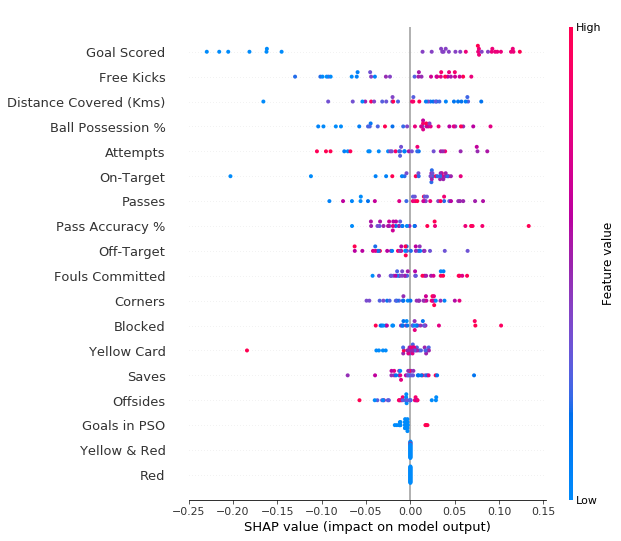

In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

The code isn't too complex. But there are a few caveats.

When plotting, we call `shap_values[1]`. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".
Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an `xgboost` model, which SHAP has some optimizations for and which is thus much faster.
This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

**SHAP Dependence Contribution Plots**
We've previously used Partial Dependence Plots to show how a single feature impacts predictions. These are insightful and relevant for many real-world use cases. Plus, with a little effort, they can be explained to a non-technical audience.

But there's a lot they don't show. For instance, what is the distribution of effects? Is the effect of having a certain value pretty constant, or does it vary a lot depending on the values of other feaures. SHAP dependence contribution plots provide a similar insight to PDP's, but they add a lot more detail.

<img src="https://i.imgur.com/uQ2JmBm.png" width=350>

Start by focusing on the shape, and we'll come back to color in a minute. Each dot represents a row of the data. The horizontal location is the actual value from the dataset, and the vertical location shows what having that value did to the prediction. The fact this slopes upward says that the more you possess the ball, the higher the model's prediction is for winning the Man of the Match award.

The spread suggests that other features must interact with Ball Possession %. For example, here we have highlighted two points with similar ball possession values. That value caused one prediction to increase, and it caused the other prediction to decrease.

<img src="https://i.imgur.com/tFzp6jc.png" width=350>

For comparison, a simple linear regression would produce plots that are perfect lines, without this spread.

This suggests we delve into the interactions, and the plots include color coding to help do that. While the primary trend is upward, you can visually inspect whether that varies by dot color.

Consider the following very narrow example for concreteness.

<img src="https://i.imgur.com/NVB3eNW.png" width=350>

These two points stand out spatially as being far away from the upward trend. They are both colored purple, indicating the team scored one goal. You can interpret this to say In general, having the ball increases a team's chance of having their player win the award. But if they only score one goal, that trend reverses and the award judges may penalize them for having the ball so much if they score that little.

Outside of those few outliers, the interaction indicated by color isn't very dramatic here. But sometimes it will jump out at you.

If you don't supply an argument for interaction_index, Shapley uses some logic to pick one that may be interesting.

This didn't require writing a lot of code. But the trick with these techniques is in thinking critically about the results rather than writing code itself.

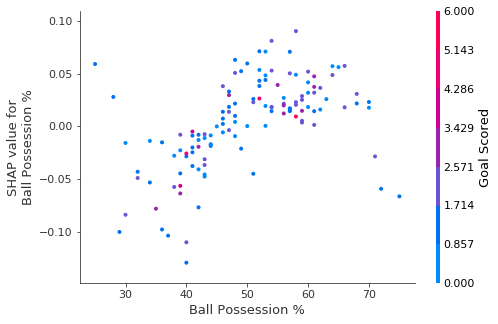

In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")